# NLP - Sentiment Classification

## Introduction
In this excercise, you will get aquainted with:

0. Data preprocessing
1. Word Embeddings
2. Sentiment Classification/Analysis

###About limits of Google Colab:   
The 12-hour limit is for a continuous assignment of VM. It means we can use GPU compute even after the end of 12 hours by connecting to a different VM.

### Author:
* Jan Kohút (ikohut@fit.vutbr.cz)


## Dependencies
* *torch* – automatic gradient derivation, loss optimization, pre-implemented model primitives
* *torchtext* – for easy processing of text data
* *spacy* – text preprocessing
* *matplotlib* – graph visualisation


## Runtime type

* First, set the runtime type to GPU: Runtime -> Change runtime type -> under Hardware accelerator chose GPU

## Checking for GPU

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  !nvidia-smi
else:
  print("GPU is not availible: Runtime -> Change runtime type -> GPU")


Tesla T4
Wed Jul 21 11:57:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |   1126MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               

## Easy progress bar for visualization
 
Whenever some data are processed you will see a progress bar, you can decide if you are willing to wait for a long time and preprocess a larger amount of dataset. 

In [ ]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

## Preprocessing of data

Most of the text datasets need to be preprocessed in some way. Often there are characters/words that are not useful for Sentiment Classification. Some words may be prefixed or suffixed with unnecessary characters.

For this exercise, we simply replace or multiple white spaces with a single space. Also, we discard quotations. You can simply add other filters.

In [ ]:
# Replace all multiple spaces, new lines, and tabs with a single space and remove quotations
# These filters are specifically designed for the Yelp datasets
# You can add other filters (and experiment with different datasets)

import re

def preprocess_line(line):
  preprocessed_line = line
  preprocessed_line = re.sub(r'( |(\\n)|\t)+', ' ', preprocessed_line)
  preprocessed_line = re.sub(r'\\"', '', preprocessed_line)
  return preprocessed_line

In [ ]:
# Takes PyTorch dataset and returns three lists: labels, original lines, and preprocessed lines
# You can choose how much data you want (to speed up the preprocessing)

def preprocess_data(data, max_size=2000):
  labels = []
  lines = []
  lines_preprocessed = []

  if len(data) < max_size:
    max_size = len(data)
  progress_bar = display(progress(1, max_size), display_id=True)

  for i, (label, line) in enumerate(data):
    labels.append(label)
    lines.append(line)
    lines_preprocessed.append(preprocess_line(line))
    progress_bar.update(progress(i, max_size))
    if i == max_size - 1:
      break

  return labels, lines, lines_preprocessed

In [ ]:
# Calls data preprocessing for training and testing part of the dataset

def preprocess_dataset(trn_dataset, tst_dataset, trn_max_size=2000, tst_max_size=1000):
  trn_labels, trn_lines, trn_lines_preprocessed = preprocess_data(trn_dataset, max_size=trn_max_size)
  tst_labels, tst_lines, tst_lines_preprocessed = preprocess_data(tst_dataset, max_size=tst_max_size)
  return trn_labels, trn_lines, trn_lines_preprocessed, tst_labels, tst_lines, tst_lines_preprocessed

### Choosing your dataset

Now, you can choose the dataset you want to experiment with. Theoretically, all should work, but I tested it only with the YelpReviewFull dataset.

Typically, these datasets contain lines of text with assign labels. For example, the YelpReviewFull dataset contains reviews of Restaurants, Dentists, Bars, Beauty Salons, Doctors with rating/stars/labels (1, 2, 3, 4, or 5).

You can later return and choose a different dataset (and do the whole exercise/clicking again). Don't be afraid. It's pretty fast, once you are done the first time. 

**For now, choose only one dataset and proceed.**

In [ ]:
from torchtext.datasets import YelpReviewFull
pytorch_dataset = YelpReviewFull(root='.data', split=('train', 'test'))

yelp_review_full_csv.tar.gz: 196MB [00:01, 154MB/s]


In [ ]:
from torchtext.datasets import YelpReviewPolarity
pytorch_dataset = YelpReviewPolarity(root='.data', split=('train', 'test'))

In [ ]:
from torchtext.datasets import AG_NEWS
pytorch_dataset = AG_NEWS(root='.data', split=('train', 'test'))

In [ ]:
from torchtext.datasets import SogouNews
pytorch_dataset = SogouNews(root='.data', split=('train', 'test'))

In [ ]:
from torchtext.datasets import YahooAnswers
pytorch_dataset = YahooAnswers(root='.data', split=('train', 'test'))

In [ ]:
from torchtext.datasets import AmazonReviewPolarity
pytorch_dataset = AmazonReviewPolarity(root='.data', split=('train', 'test'))

In [ ]:
from torchtext.datasets import AmazonReviewFull
pytorch_dataset = torchtext.datasets.AmazonReviewFull(root='.data', split=('train', 'test'))

### Size of the dataset

Now, if you have a lot of time you can preprocess a lot of data. The benefit is that the final neural network will be more accurate. The downside: it is slow. But you can achieve sensible results with as little data as 10000 lines, but if you have more time, use more.

In [ ]:
# Set the number of your training lines (reviews or whatever your lines represent)
trn_max_size = 10000
# Set the number of your testing lines (reviews or whatever your lines represent)
tst_max_size = 2000

trn_labels, trn_lines, trn_lines_preprocessed, tst_labels, tst_lines, tst_lines_preprocessed = preprocess_dataset(pytorch_dataset[0], pytorch_dataset[1], trn_max_size=trn_max_size, tst_max_size=tst_max_size)

Explore the returned data and the difference between lines and preprocessed lines.



In [ ]:
print(trn_labels[25])
print(trn_lines[25])
print(trn_lines_preprocessed[25])

### Tokenization

Every line needs to be converted to tokens (usually corresponds to a word). So, for example: "An exercise about sentiment classification." will be split to:

* An 
* exercise 
* about 
* sentiment 
* classification
* .


In [ ]:
from torchtext.data.utils import get_tokenizer

# Use the spaCy library for tokenization
def tokenize_lines(lines):
  tokens = []
  len_lines = len(lines)

  progress_bar = display(progress(1, len_lines), display_id=True)

  spacy_tokenizer = get_tokenizer("spacy", language='en')

  for i, line in enumerate(lines):
    tokens.append(spacy_tokenizer(line))
    progress_bar.update(progress(i, len_lines))

  return tokens

Run the tokenization of preprocessed lines.

In [ ]:
trn_tokens = tokenize_lines(trn_lines_preprocessed)
tst_tokens = tokenize_lines(tst_lines_preprocessed)

Explore the returned tokens and the difference to preprocessed lines.

In [ ]:
print(trn_lines_preprocessed[25])
print(trn_tokens[25])

### Word Embeddings

Now, we need word embeddings. Word embeddings represent words (tokens) with vectors of the same dimensionality. For this exercise, we use GloVe https://nlp.stanford.edu/projects/glove/ pre-trained embeddings, specifically, its 6B variant with the dimensionality being 100.

Again, you can use different pre-trained embeddings (either change the dimensionality, or change the GloVe for fastText, or something else), it's a matter of your choice. 

Beware, some libraries might be huge and you are limited (here on Colab) when it comes to memory.

In [ ]:
from torchtext.vocab import GloVe
# Download the Glove, 6B, 100D
Glove_6B = GloVe(name='6B', dim=100)

In [ ]:
# Converts tokens to word embeddings
def get_lines_word_embeddings_for_tokens(tokens, pretrained_word_embeddings):
  len_tokens = len(tokens)
  lines_word_embeddings = []

  progress_bar = display(progress(1, len_tokens), display_id=True)
  
  for i, line_tokens in enumerate(tokens):
      line_word_embeddings = pretrained_word_embeddings.get_vecs_by_tokens(line_tokens, lower_case_backup=True)
      lines_word_embeddings.append(line_word_embeddings)
          
      progress_bar.update(progress(i, len_tokens))
  
  return lines_word_embeddings

Convert each token to corresponding word embedding.

In [ ]:
trn_lines_word_embeddings = get_lines_word_embeddings_for_tokens(trn_tokens, Glove_6B)
tst_lines_word_embeddings = get_lines_word_embeddings_for_tokens(tst_tokens, Glove_6B)

Explore the returned embeddings and the difference to tokens.

In [ ]:
# Each token is now represented with a vector of the same dimensionality
print(trn_tokens[20])
print(trn_lines_word_embeddings[20])
print(trn_lines_word_embeddings[20].shape)

In [ ]:
# Print a specific word with its corresponding token
print(trn_tokens[20][1])
print(trn_lines_word_embeddings[20][1])

These pre-trained word embeddings have actual semantic meaning, so by adding and substracting them, you can get sensible results. For example: King + (Woman - Man) = Result. The nearest vector to the Result vector should be a vector that represents Queen.

As you might guess, some words/tokens do not have corresponding word embeddings in the pre-trained word embeddings library. PyTorch assigns 0 vectors to such words/tokens.

In [ ]:
# Counts the number of zero vectors (word embeddings), returns also the total
def get_number_of_zero_word_embeddings(lines_word_embeddings):
  len_word_embeddings = len(lines_word_embeddings)
  number_of_zero_word_embeddings = 0
  number_of_word_embeddings = 0
  
  progress_bar = display(progress(1, len_word_embeddings), display_id=True)
  
  for i, line_word_embeddings in enumerate(lines_word_embeddings):
    for e in line_word_embeddings:
      if e.sum() == 0:
        number_of_zero_word_embeddings += 1
      number_of_word_embeddings += len(line_word_embeddings)

    progress_bar.update(progress(i, len_word_embeddings))
  
  return number_of_word_embeddings, number_of_zero_word_embeddings


Count the zero word embeddings to check if we have a sensible dataset.

In [ ]:
trn_number_of_word_embeddings, trn_number_of_zero_word_embeddings = get_number_of_zero_word_embeddings(trn_lines_word_embeddings)
tst_number_of_word_embeddings, tst_number_of_zero_word_embeddings = get_number_of_zero_word_embeddings(tst_lines_word_embeddings)

Print the fraction of zero word embeddings in our dataset, it should be marginal.

In [ ]:
print("TRN {:.10f}%".format((trn_number_of_zero_word_embeddings / float(trn_number_of_word_embeddings)) * 100))
print("TST {:.10f}%".format((tst_number_of_zero_word_embeddings / float(tst_number_of_word_embeddings)) * 100))

TRN 0.0021970226%
TST 0.0020701577%


## Building the dataset 

Now that we've preprocessed the data, we need to create a data loader that will serve for the training and testing of the neural network. 

### SentimentDataset class

To achieve batch training of the neural network (and therefore effective parallelization on GPU) we need lines (reviews or whatever it is for you) to have the same lengths. This class allows you to pick the length of the lines/sequences/reviews/ which is the number of words/number of tokens. Lines that are longer are simply cropped, shorter lines are padded with zero vectors.

The class (object of this class) also returns weights for each word/token in the sequence. The weights are the same for all words, but zero for the padded vectors.

In [ ]:
from torch.utils.data import Dataset
from torch.nn.functional import pad
from torch import ones

class SentimentDataset(Dataset):

    def __init__(self, labels, lines_word_embeddings, words_per_line=350):
        self.labels = labels
        self.lines_word_embeddings = lines_word_embeddings

    def __len__(self):
        return len(self.labels)

    def crop_and_pad_line_word_embeddings_with_zero_word_embeddings(self, line_word_embeddings):
      if line_word_embeddings.shape[0] < words_per_line:
        pad_size = words_per_line - line_word_embeddings.shape[0]
        padded_line_word_embeddings = pad(line_word_embeddings, (0, 0, 0, pad_size), mode='constant', value=0)
        padded_line_word_weights = pad(ones(line_word_embeddings.shape[0], 1)/line_word_embeddings.shape[0], (0, 0, 0, pad_size), mode='constant', value=0)
        return padded_line_word_embeddings, padded_line_word_weights      
      else:
        padded_line_word_weights = ones(words_per_line, 1)/words_per_line
        return line_word_embeddings[:words_per_line], padded_line_word_weights

    def __getitem__(self, idx):
      crop_and_pad_line_word_embedding, padded_line_word_weights = self.crop_and_pad_line_word_embeddings_with_zero_word_embeddings(self.lines_word_embeddings[idx])
      return {'labels': self.labels[idx] - 1, 'lines_word_embeddings': crop_and_pad_line_word_embedding, 'lines_word_weights': padded_line_word_weights}

Create PyTorch Dataset for Sentiment Classification.

In [ ]:
# You can set the words per line here, the longer the sequence, the slower will be the training/inference of the neural network.
words_per_line = 350

trn_dataset = SentimentDataset(trn_labels, trn_lines_word_embeddings, words_per_line=words_per_line)
tst_dataset = SentimentDataset(tst_labels, tst_lines_word_embeddings, words_per_line=words_per_line)

Create PyTorch DataLoader for Sentiment Classification.

In [ ]:
from torch.utils.data import DataLoader

# Choose your batch size
batch_size = 32

trn_data_loader = DataLoader(trn_dataset, batch_size=batch_size, shuffle=True)
tst_data_loader = DataLoader(tst_dataset, batch_size=batch_size, shuffle=True)

### SentimentNet class (The neural network for sentiment classification)

The computational graph (illustration) of the net can be found here: https://drive.google.com/file/d/1bS_3QjzD-uVvD45uj2mfPY2TROJfR3V5/view?usp=sharing

$$
core\_net = W_1 * tanh((W_0 * E) + b_0))
$$

$$
net = SoftMax(AVG(core\_net))
$$



# Your task

Your goal is to implement the *core_net* according to the given illustration and mathematical expression.

#### Tips
* Use two nn.Linear layers, one with the bias set to True (b_0), the other with the bias set to false (just W_1)
* Use nn.Tanh
* Basically an affine transformation followed by nonlinearity and final linear transformation
* Feel free to experiment with more complex (or simpler models)

#### Dimensions
* E_dim is the word embedding dimension
* I_dim is the dimension of the vectors after the first affine transformation (after the first nn.Linear with the bias set to True (W_0, b_0))
* C is the number of the classes (5 for YelpReviewFull) and the dimensionality of the vectors after the linear transformation (second nn.Linear (W_1))

### Averaging and training

The output of *core_net* is averaged based on the weights provided by the dataset (dataloader), remember, the zero-padding vectors have zero weights and therefore have no effect when it comes to training.

The averaged outputs of *core_net* are fed to SoftMax and the Net as a whole is trained with the standard CrossEntropy loss.

In [ ]:
from torch import nn
from torch import sum

class SentimentNet(nn.Module):
    def __init__(self, E_dim, I_dim, C):
        super(SentimentNet, self).__init__()
        self.E_dim = E_dim
        self.I_dim = I_dim
        self.C = C
        #nn.Linear
        #nn.Tanh
        #nn.Linear

    def forward(self, line_word_embeddings, line_word_weights):
        x = line_word_embeddings
        w = line_word_weights
        
        #core_net = call first nn.Linear
        #core_net = call nn.Tanh
        #core_net = call secod nn.Linear

        net = core_net * w
        net = sum(net, dim=1)

        return net, core_net

Before training, check the GPU again.

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  !nvidia-smi
else:
  print("GPU is not availible: Runtime -> Change runtime type -> GPU")

Tesla T4
Wed Jul 21 11:33:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               

###SentimentTrainWrapper class 

A helper class for training that provides standard methods as:
* train_step - makes one training step (forward pass, backward pass, update of the net parameters)
* test_step - makes one testing step (forward pass)


In [ ]:
import sys
from torch.nn import Softmax
from torch import sum

class SentimentTrainWrapper:
    def __init__(self, E_dim, I_dim, C, learning_rate):
      self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
      if device.type != 'cuda':
        print("GPU is not availible: Runtime -> Change runtime type -> GPU")
        sys.exit(1)
      self.net = SentimentNet(E_dim, I_dim, C)
      self.net = self.net.to(self.device)
      self.loss = torch.nn.CrossEntropyLoss().to(self.device)
      self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)

    def train_step(self, batch):
        self.optimizer.zero_grad()
        output, loss = self.forward_pass(batch)
        loss.backward()
        self.optimizer.step()
        return output, loss

    def test_step(self, batch):
        output, loss = self.forward_pass(batch)
        return output, loss

    def forward_pass(self, batch):
        labels = batch['labels'].to(self.device)
        lines_word_embeddings = batch['lines_word_embeddings'].to(self.device)
        lines_word_weights = batch['lines_word_weights'].to(self.device)

        output, _ = self.net.forward(lines_word_embeddings, lines_word_weights)
        loss = self.loss(output, labels)
        return output, loss

    def inference_pass(self, batch):
        lines_word_embeddings = batch['lines_word_embeddings'].to(self.device)
        lines_word_weights = batch['lines_word_weights'].to(self.device)

        aggregated_output, output_per_word = self.net.forward(lines_word_embeddings, lines_word_weights)
        return aggregated_output, output_per_word

    def count_accuracy(self, batch, output):
        labels = batch['labels'].to(self.device)
        predictions = torch.argmax(output, dim=1).to(self.device)
        return sum(labels == predictions) / batch['labels'].shape[0]

    def count_probs(self, output, dim=1):
        return Softmax(dim=dim)(output)

    def set_train(self):
        self.net = self.net.train()

    def set_eval(self):
        self.net = self.net.eval()


Initialize the network.

In [ ]:
# Set the appropriate dimensions
E_dim = 100
I_dim = 200 
C = 5

# Choose your learning rate
learning_rate = 0.0003

# Init the training and the net
sentiment_train_wrapper = SentimentTrainWrapper(E_dim, I_dim, C, learning_rate)

Functions for testing the net.

In [ ]:
def is_valid_iter(it_no, step):
  return it_no % step == 0

def test(sentiment_train_wrapper, iteration, dataset, train):
    total_loss = 0
    total_accuracy = 0
    total_number_of_lines = 0
    start_time = time.time()
    total_net_time = 0
    total_images_area = 0

    with torch.no_grad():
        for it_count, batch in enumerate(dataset, 1):
            net_t1 = time.time()
            outs, loss = sentiment_train_wrapper.test_step(batch)
            total_net_time += time.time() - net_t1

            total_loss += loss.mean().item()
            total_accuracy += sentiment_train_wrapper.count_accuracy(batch, outs)
            total_number_of_lines += batch['lines_word_embeddings'].shape[0]

            if train:
                if it_count > 1500 // dataset.batch_size:
                    break

    end_time = time.time()

    trn_tst = "TST DATASET"
    if train:
      trn_tst = "TRN DATASET"

    print('{} loss:{:.5f} accuracy:{:.2f}% full_speed:{:.0f} net_speed:{:.0f} time:{:.1f}'.format(
           trn_tst,
           total_loss / it_count,
           (total_accuracy / it_count) * 100,
           total_number_of_lines / (end_time - start_time),
           total_number_of_lines / total_net_time,
           end_time - start_time))

### Training the network for sentiment classification

The main training cycle. If you stop or rerun this cycle the previous model (with its weights) is still stored in the memory, so you will continue to finetune this model. To start from scratch you have to rerun the initialization of sentiment_train_wrapper.

You can see if the network is performing better than "guessing" based on accuracy. If you have 5 classes, it should be better than 20% (on YelpFullReview you should get to 50% pretty quickly).

In [ ]:
# The number of trainig iterations
max_iterations = 5000
# The interval (in iterations) of printing training and testing statistics
test_step = 250

iteration = 0

total_number_of_lines = 0
trn_loss = 0.0
trn_accuracy = 0.0

train_time = 0.0
train_net_time = 0.0
training_time = 0.0

stop_training = False

while True:
  for batch in trn_data_loader:
    show_test = is_valid_iter(iteration, test_step)
    show_train = is_valid_iter(iteration, test_step) and iteration > 0
    
    if show_test or show_train:
      print()
      print("ITERATION {}".format(iteration))
      print("---------------------------------------------------------------------------------------------------")
    
    # Test the network and show the results on training and testing dataset
    if show_test:
      if iteration > 0:
        train_time = time.time() - train_timer
      train_timer = time.time()

      sentiment_train_wrapper.set_eval()
      test(sentiment_train_wrapper, iteration, trn_data_loader, True)
      test(sentiment_train_wrapper, iteration, tst_data_loader, False)
      sentiment_train_wrapper.set_train()
    
    # Show training statistics
    if show_train:
      training_time += train_time
      net_speed = (test_step * lines_word_embeddings.shape[0]) / train_net_time
      trn_loss /= test_step
      trn_accuracy /= test_step
      print("TRAIN {} ({:d}k lines seen) loss:{:.5f} accuracy:{:.2f}% time:{:.1f} net_speed:{}".format(
            iteration,
            total_number_of_lines // 1000,
            trn_loss,
            trn_accuracy * 100,
            train_time,
            net_speed,
            ))
      print()
      train_net_time = 0.0
      trn_loss = 0.0
      trn_accuracy = 0.0
            
    if show_test or show_train:
      print("---------------------------------------------------------------------------------------------------")
   
    if iteration == max_iterations:
      stop_training = True
      break
    
    # Extract the data from the batch
    labels = batch['labels']
    lines_word_embeddings = batch['lines_word_embeddings']
    lines_word_weights = batch['lines_word_weights']
            
    # The actual training
    start_of_the_train_step = time.time()
    outs, loss = sentiment_train_wrapper.train_step(batch)
    train_net_time += time.time() - start_of_the_train_step
    
    # Accumulate some statistics
    loss = loss.mean()
    accuracy = sentiment_train_wrapper.count_accuracy(batch, outs)
    trn_loss += loss
    trn_accuracy += accuracy 
    total_number_of_lines += lines_word_embeddings.shape[0]

    iteration += 1

  if stop_training:
    break

training_time += time.time() - train_timer

print()
print("AVERAGE TIME OF 100 ITERATIONS: {}".format((training_time / (max_iterations)) * 100))

## Playing with the Sentiment Network

Now we can observe if the network is doing something sensible. Simply assign your "review" into the my_review variable and proceed.

In [ ]:
# Converts line of text into the input for the network (also returns the tokenized version of the input text line)
def convert_my_review_to_input_for_sentiment_net(review, pretrained_word_embeddings):
  my_review_preprocessed = preprocess_line(review)
  my_review_tokens = tokenize_lines([my_review_preprocessed])
  my_review_word_embeddings = get_lines_word_embeddings_for_tokens(my_review_tokens, pretrained_word_embeddings)[0]

  my_review_batch = {}
  my_review_batch['lines_word_embeddings'] = my_review_word_embeddings.unsqueeze(0)
  my_review_batch['lines_word_weights'] = ones(1, my_review_word_embeddings.shape[0], 1)/my_review_word_embeddings.shape[0]

  return my_review_batch, my_review_tokens[0]

In [ ]:
# Write your review
my_review = "I love this beautiful place!"

In [ ]:
# Preprocess your review for the net
input_for_sentiment_net, my_review_tokens = convert_my_review_to_input_for_sentiment_net(my_review, Glove_6B)

In [ ]:
# Pass the review through the net
aggregated_output, per_word_output = sentiment_train_wrapper.inference_pass(input_for_sentiment_net)

In [ ]:
# Convert the logits into probabilities with SoftMax
my_review_probs = sentiment_train_wrapper.count_probs(aggregated_output)
my_review_word_probs = sentiment_train_wrapper.count_probs(per_word_output, dim=2)
my_review_probs = my_review_probs[0, :].tolist()
my_review_word_probs = my_review_word_probs[0, :, :].tolist()

#### Print the results for the whole review

In [ ]:
for star, prob in enumerate(my_review_probs, 1):
  print(star, "{:.2f}".format(prob))

#### Print the results for each word in the review


In [ ]:
for word, probs in zip(my_review_tokens, my_review_word_probs):
  print(word)
  for star, prob in enumerate(probs, 1):
    print(star, "{:.2f}".format(prob))
  print()

#### Plot the results for each word in the review


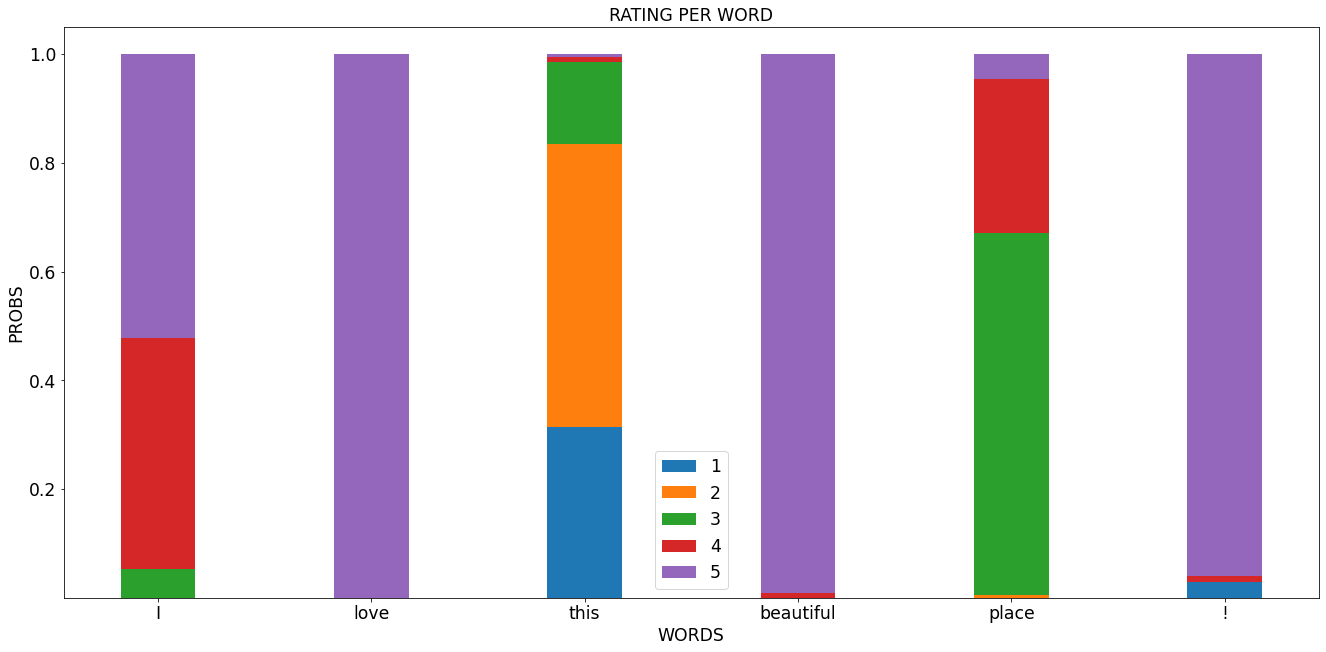

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

labels = my_review_tokens
probs = np.transpose(np.asarray(my_review_word_probs))

width = 0.35   

fig, ax = plt.subplots()

fig.set_size_inches(22.5, 10.5)

indexes = list(range(probs.shape[1]))

bottom = np.zeros(probs.shape[1])
for star, p in enumerate(probs):
  ax.bar(indexes, p, width, bottom=bottom, label=star+1)
  bottom += p

plt.xticks(indexes, labels, rotation=0)

ax.set_xlabel('WORDS')
ax.set_ylabel('PROBS')
ax.set_title('RATING PER WORD')

ax.legend()

plt.show()


##Contact

If you have any questions or problems considering this exercise, you can write me an email: ikohut@fit.vutbr.cz